# México: Regresion Lineal Simple

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [285]:
# Carga de datos
cd = pd.read_csv('listings - CDMX_clean.csv') 
cd = cd.drop(['Unnamed: 0'], axis=1)
cd.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44616,196253,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,S/D,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
1,67703,334451,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",S/D,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
2,70644,212109,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
3,107078,540705,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
4,131610,647454,previous scrape,MARIA DEL ALMA,S/D,S/D,Fernando,2011-05-31,"Mexico City, Mexico",S/D,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.80,1.17


### Tratamiento de los Datos

In [286]:
# ---------------------------------------------------------------------------------
# 1) Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float
# ---------------------------------------------------------------------------------
cd = cd[cd['host_acceptance_rate'] != 'S/D']
cd['host_acceptance_rate'] = (
    cd['host_acceptance_rate']
    .str.replace('%', '')
    .astype(float)
)
# ---------------------------------------------------------------------------------
# 2) Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero
# ---------------------------------------------------------------------------------
cd['host_is_superhost'] = (
    cd['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)
# ---------------------------------------------------------------------------------
# 3) Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas
# ---------------------------------------------------------------------------------
cd['bathrooms'] = (
    cd['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
cd = cd[cd['bathrooms'].notnull()]

# ---------------------------------------------------------------------------------
# 4) Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
cd['instant_bookable'] = (
    cd['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)

# ---------------------------------------------------------------------------------
# 5) Convertir "host_identity_verified" a valores numéricos
#    - Misma lógica: 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
cd['host_identity_verified'] = (
    cd['host_identity_verified']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita
)

# ---------------------------------------------------------------------------------
# 6) Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in home': 4,
    'Entire loft': 5,
    'Entire serviced apartment': 6,
    'Private room in condo': 7,
    'Entire home': 8,
    }
cd['property_type'] = cd['property_type'].replace(types)


/tmp/ipykernel_1187843/3257558342.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1187843/3257558342.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1187843/3257558342.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [287]:
# -------------------------------------------------------------------------
# 1) Crear dataframes separados según el tipo de habitación ('room_type')
#    - Se filtra el dataframe original (cd) según los valores de la columna room_type.
# -------------------------------------------------------------------------
cd_entire = cd[cd['room_type'] == 'Entire home/apt']   # Alojamientos completos
cd_private = cd[cd['room_type'] == 'Private room']     # Habitaciones privadas
cd_shared = cd[cd['room_type'] == 'Shared room']       # Habitaciones compartidas
cd_hotel = cd[cd['room_type'] == 'Hotel room']         # Habitaciones de hotel

# -------------------------------------------------------------------------
# 2) Mostrar la frecuencia de cada tipo de habitación en cada subset
#    - Utilizamos 'value_counts()' para contar cuántas filas hay de cada tipo.
#    - El argumento 'end="\n\n"' agrega un salto de línea extra entre cada impresión.
# -------------------------------------------------------------------------
print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')


room_type
Entire home/apt    15919
Name: count, dtype: int64

room_type
Private room    7302
Name: count, dtype: int64

room_type
Shared room    340
Name: count, dtype: int64

room_type
Hotel room    87
Name: count, dtype: int64



### x = host_acceptance_rate, y = price

#### entire home/apt

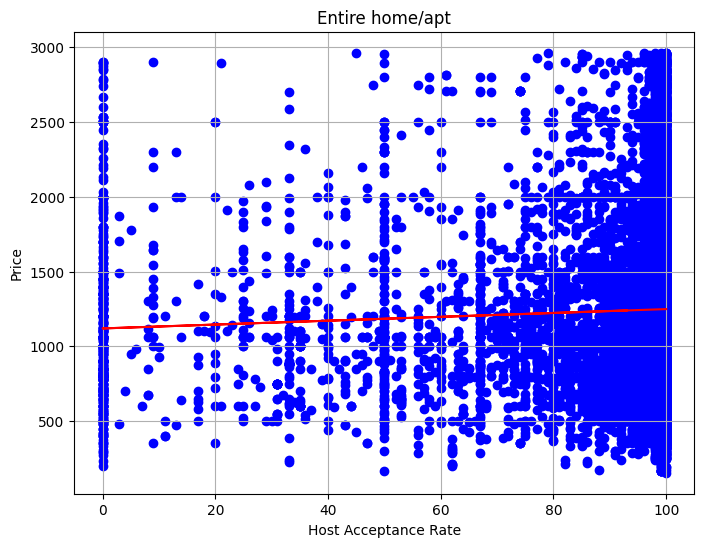

In [288]:
# ---------------------------------------------------------------------------------
# 1) Crear y ajustar un modelo de regresión lineal
#    - Usamos 'host_acceptance_rate' como variable independiente (X).
#    - Definimos 'price' como variable dependiente (y).
# ---------------------------------------------------------------------------------
model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])

# ---------------------------------------------------------------------------------
# 2) Visualizar la regresión lineal
#    - Generamos un diagrama de dispersión (scatter plot) con los datos reales.
#    - Sobre la misma gráfica, dibujamos la línea de mejor ajuste que produce el modelo.
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_acceptance_rate']],
    model.predict(cd_entire[['host_acceptance_rate']]),
    color='red'
)
plt.title('Entire home/apt')         # Título de la gráfica
plt.xlabel('Host Acceptance Rate')   # Etiqueta del eje X
plt.ylabel('Price')                  # Etiqueta del eje Y
plt.grid(True)                       # Muestra una cuadrícula para facilitar la lectura
plt.show()                           # Muestra la gráfica


In [289]:
# ---------------------------------------------------------------------------------
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
#    - model.coef_: array con la(s) pendiente(s) de la(s) variable(s) independiente(s).
#    - model.intercept_: valor del intercepto (b) en la regresión lineal.
# ---------------------------------------------------------------------------------
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# ---------------------------------------------------------------------------------
# 2) Representar el modelo lineal de forma explícita
#    - Mostramos la ecuación en el formato y = m*x + b.
# ---------------------------------------------------------------------------------
print(f'y = {m[0]}x + {b}', end='\n\n')

# ---------------------------------------------------------------------------------
# 3) Evaluar el modelo con un indicador de desempeño
#    - Utilizamos model.score() para obtener el R^2, que mide qué tan bien el modelo
#      se ajusta a los datos (1 significa un ajuste perfecto, 0 significa nulo).
# ---------------------------------------------------------------------------------
print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))

# ---------------------------------------------------------------------------------
# 4) Calcular el coeficiente de correlación entre las variables
#    - Usamos np.corrcoef() para obtener la matriz de correlación entre dos variables.
#    - El coeficiente de correlación es el valor en la posición (0, 1) de la matriz.
# ---------------------------------------------------------------------------------
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_acceptance_rate'], cd_entire['price'])[0, 1])



Pendiente: [1.29409444]
Intercepto: 1119.6677551898897
y = 1.2940944439794262x + 1119.6677551898897

Puntaje del modelo: 0.0021526649804193276
Coeficiente de correlación: 0.04639682080078167


#### private room

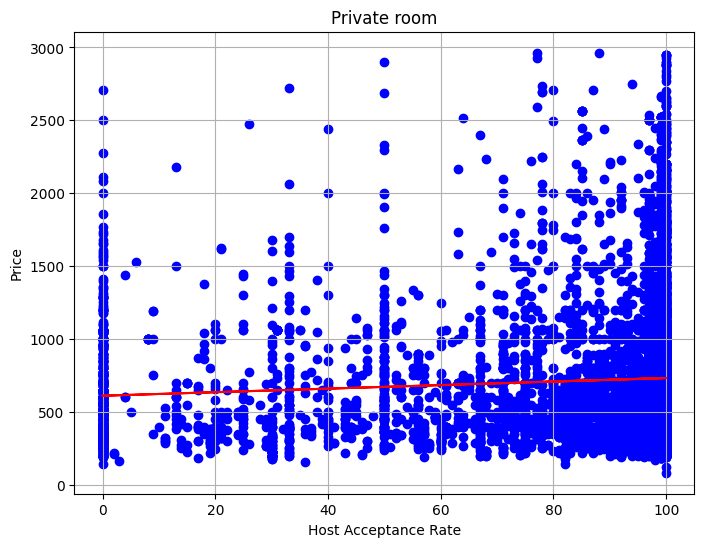

In [290]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_acceptance_rate']],
    model.predict(cd_private[['host_acceptance_rate']]),
    color='red'
)
plt.title('Private room')           # Título de la gráfica
plt.xlabel('Host Acceptance Rate')  # Etiqueta del eje X
plt.ylabel('Price')                 # Etiqueta del eje Y
plt.grid(True)                      # Activa la cuadrícula para una lectura más sencilla
plt.show()                          # Muestra la gráfica


In [291]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_acceptance_rate'], cd_private['price'])[0, 1])


Pendiente: [1.21757765]
Intercepto: 611.0333893206392
y = 1.2175776499097992x + 611.0333893206392

Puntaje del modelo: 0.005896798729804309
Coeficiente de correlación: 0.07679061615721436


#### shared room

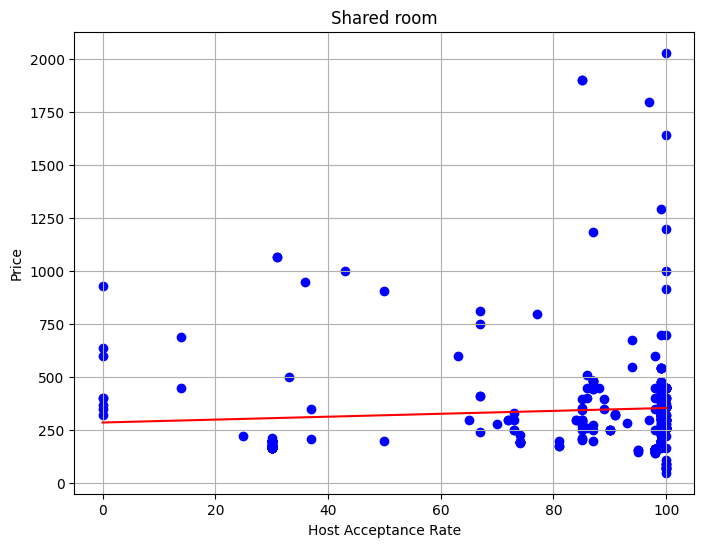

In [292]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_acceptance_rate']],
    model.predict(cd_shared[['host_acceptance_rate']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [293]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_acceptance_rate'], cd_shared['price'])[0, 1])

Pendiente: [0.68549839]
Intercepto: 286.56470663174946
y = 0.6854983911903956x + 286.56470663174946

Puntaje del modelo: 0.005898252264965431
Coeficiente de correlación: 0.07680007984999304


#### hotel room

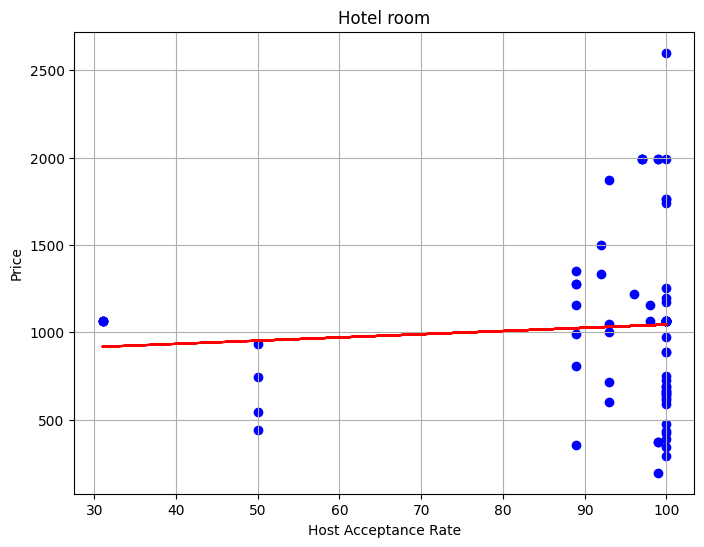

In [294]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_acceptance_rate']], 
    model.predict(cd_hotel[['host_acceptance_rate']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [295]:
# 1) Obtener los parámetros de la regresión lineal en habitaciones privadas
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Mostrar la ecuación resultante del modelo
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el rendimiento del modelo mediante el coeficiente de determinación (R²)
print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_acceptance_rate'], cd_hotel['price'])[0, 1])

Pendiente: [1.839277]
Intercepto: 860.6321166620064
y = 1.839277002362163x + 860.6321166620064

Puntaje del modelo: 0.004804918363333743
Coeficiente de correlación: 0.06931751844471597


### x = host_is_superhost, y = price

#### Entire home/apt

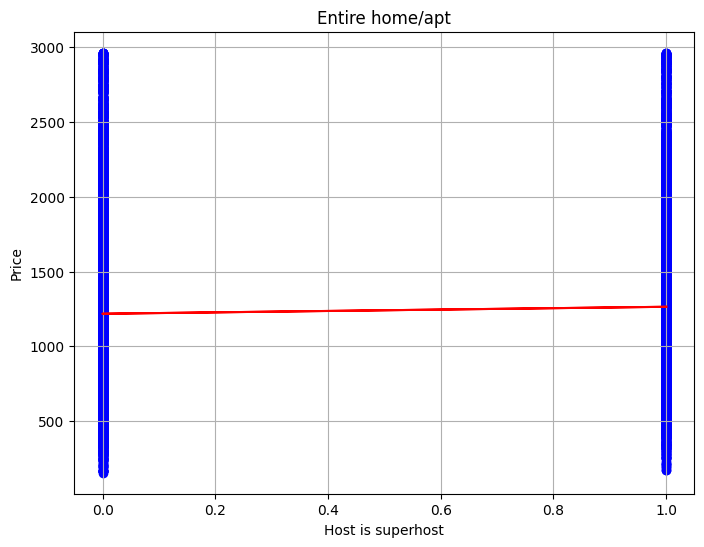

In [296]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_is_superhost']], 
    model.predict(cd_entire[['host_is_superhost']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [297]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_is_superhost'], cd_entire['price'])[0, 1])

Pendiente: [1.839277]
Intercepto: 1217.8926214269115
y = 1.839277002362163x + 1217.8926214269115

Puntaje del modelo: 0.0017867811179029802
Coeficiente de correlación: 0.04227033378035974


#### private room

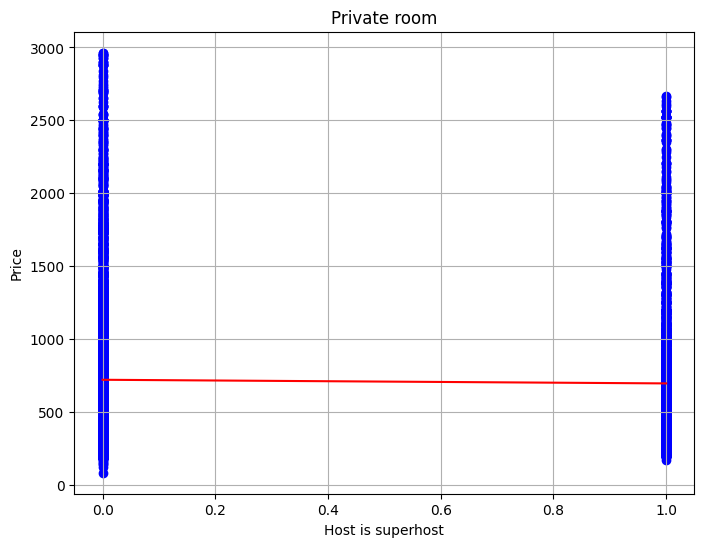

In [298]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_is_superhost']],
    model.predict(cd_private[['host_is_superhost']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [299]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_is_superhost'], cd_private['price'])[0, 1])

Pendiente: [-24.93672149]
Intercepto: 720.594854024374
y = -24.93672149425342x + 720.594854024374

Puntaje del modelo: 0.0006379305931213386
Coeficiente de correlación: -0.025257287920947433


#### shared room

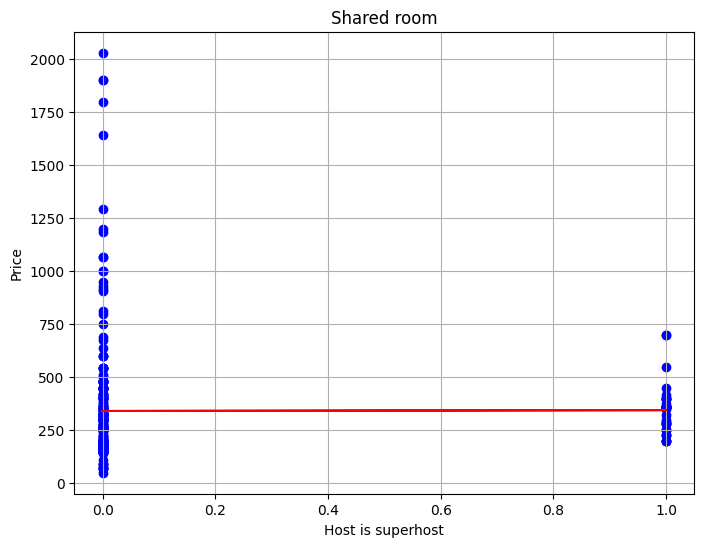

In [300]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_is_superhost']],
    model.predict(cd_shared[['host_is_superhost']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [301]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_is_superhost'], cd_shared['price'])[0, 1])

Pendiente: [3.95416667]
y = 3.9541666666666906x + 340.93333333333334

Puntaje del modelo: 2.382311619031352e-05
Coeficiente de correlación: 0.004880892970564334


#### hotel room

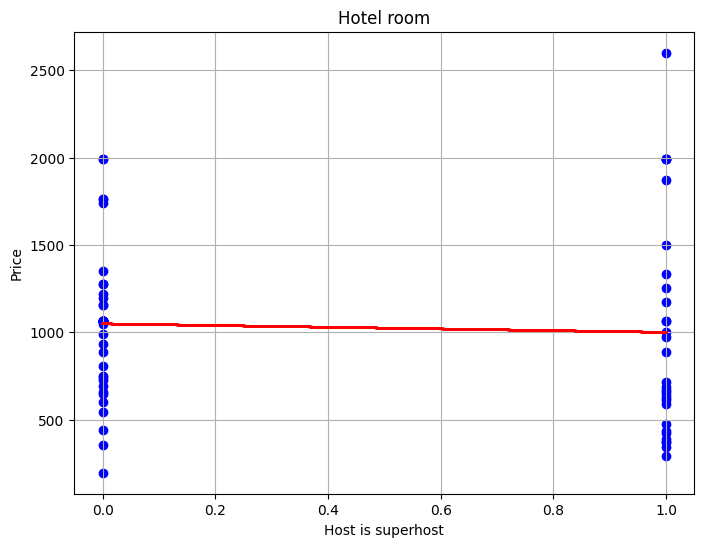

In [302]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_is_superhost']],
    model.predict(cd_hotel[['host_is_superhost']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [303]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_is_superhost'], cd_hotel['price'])[0, 1])

Pendiente: [-48.67889785]
Intercepto: 1048.6708333333333
y = -48.678897849462395x + 1048.6708333333333

Puntaje del modelo: 0.0026014778681434647
Coeficiente de correlación: -0.05100468476662962


### x = bathrooms, y = accomodates

#### Entire home/apt

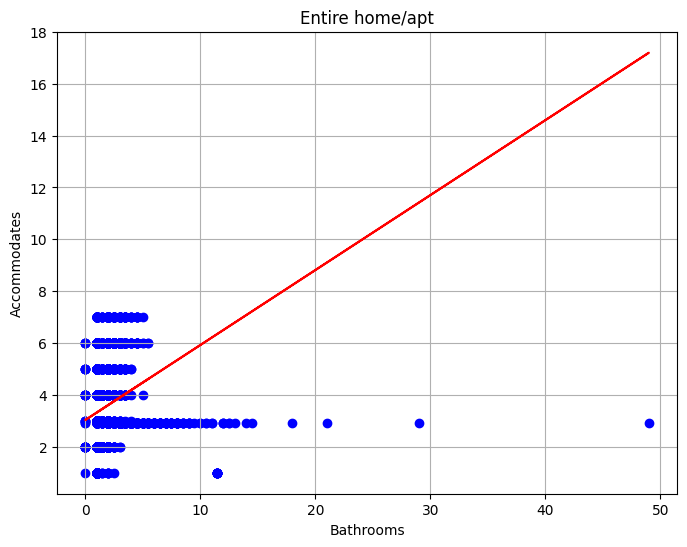

In [304]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(
    cd_entire[['bathrooms']],
    model.predict(cd_entire[['bathrooms']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [305]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['bathrooms'], cd_entire['accommodates'])[0, 1])

Pendiente: [0.28908891]
Intercepto: 3.031293366765582
y = 0.28908891215952087x + 3.031293366765582

Puntaje del modelo: 0.0479341768841105
Coeficiente de correlación: 0.21893875144453057


#### Private room

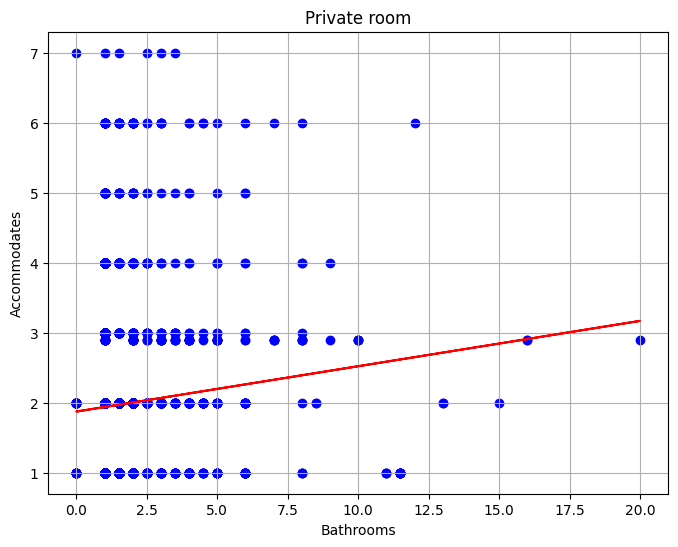

In [306]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(
    cd_private[['bathrooms']],
    model.predict(cd_private[['bathrooms']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [307]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['bathrooms'], cd_private['accommodates'])[0, 1])

Pendiente: [0.0647674]
Intercepto: 1.8736777422692854
y = 0.064767400463629x + 1.8736777422692854

Puntaje del modelo: 0.0055024574233706325
Coeficiente de correlación: 0.07417855096570045


#### shared room

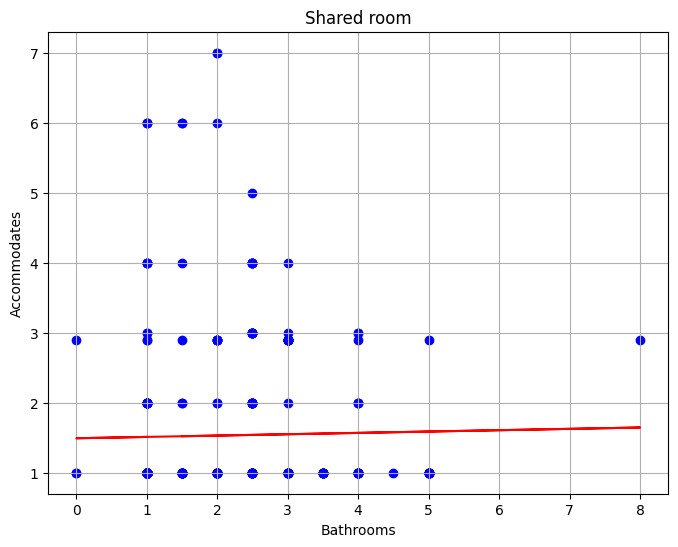

In [308]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(
    cd_shared[['bathrooms']], 
    model.predict(cd_shared[['bathrooms']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [309]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['bathrooms'], cd_shared['accommodates'])[0, 1])

Pendiente: [0.01918294]
Intercepto: 1.492343036661529
y = 0.019182938046258476x + 1.492343036661529

Puntaje del modelo: 0.0004760446505841509
Coeficiente de correlación: 0.021818447483356044


#### hotel room

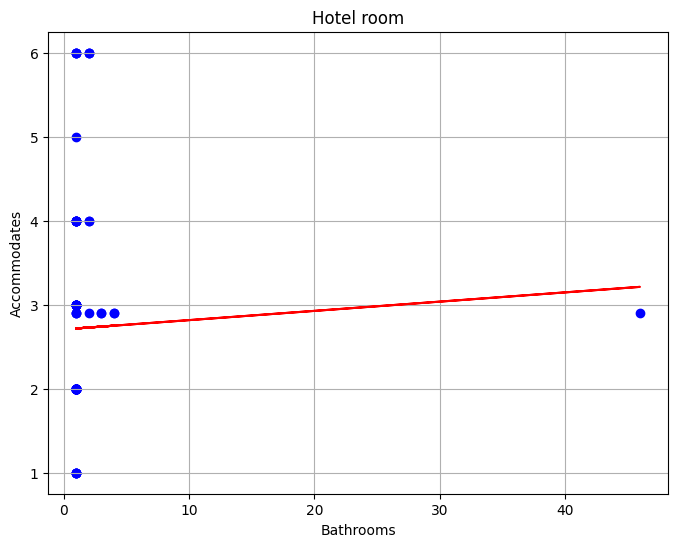

In [310]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(
    cd_hotel[['bathrooms']],
    model.predict(cd_hotel[['bathrooms']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [311]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['bathrooms'], cd_hotel['accommodates'])[0, 1])

Pendiente: [0.01100047]
Intercepto: 2.706573916616259
y = 0.011000467935036916x + 2.706573916616259

Puntaje del modelo: 0.0018118840186517327
Coeficiente de correlación: 0.042566230966008166


### x = review_score_cleanliness, y = price

#### Entire home/apt

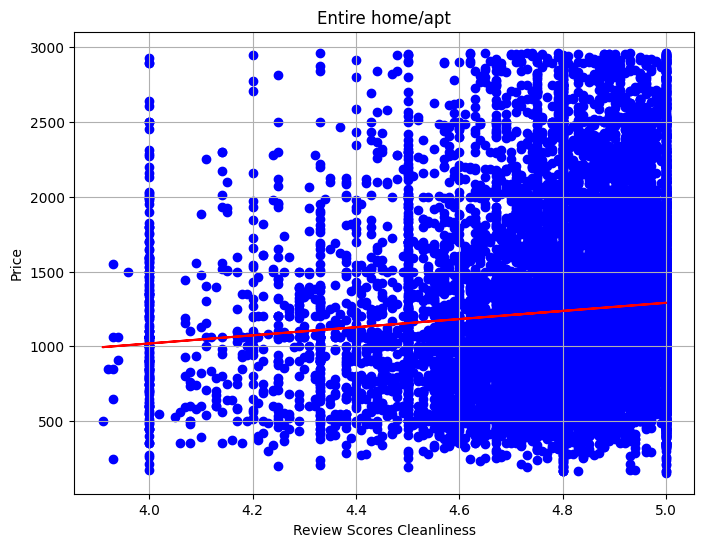

In [312]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['review_scores_cleanliness']], 
    model.predict(cd_entire[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [313]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['review_scores_cleanliness'], cd_entire['price'])[0, 1])

Pendiente: [272.3309673]
y = 272.3309672954994x + -70.3456827600171

Puntaje del modelo: 0.00887005065803359
Coeficiente de correlación: 0.09418094636408142


#### private room

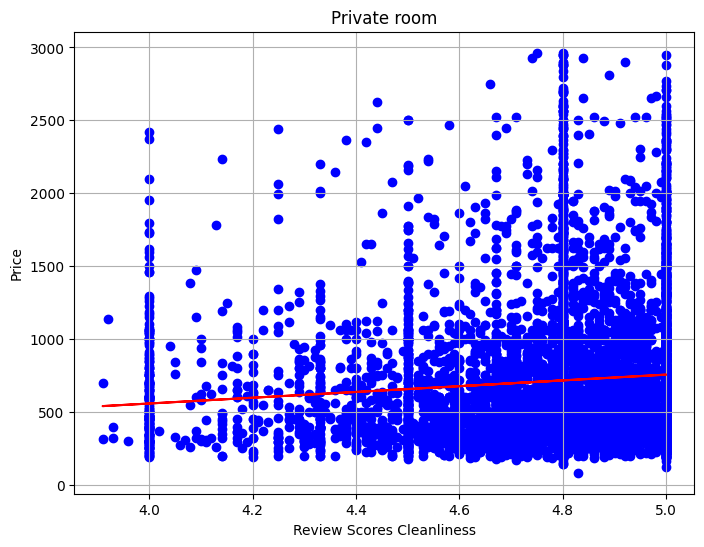

In [314]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['review_scores_cleanliness']],
    model.predict(cd_private[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [315]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['review_scores_cleanliness'], cd_private['price'])[0, 1])

Pendiente: [198.21445371]
y = 198.2144537064902x + -235.11166020179314

Puntaje del modelo: 0.009310689985329579
Coeficiente de correlación: 0.09649191668388787


#### shared room

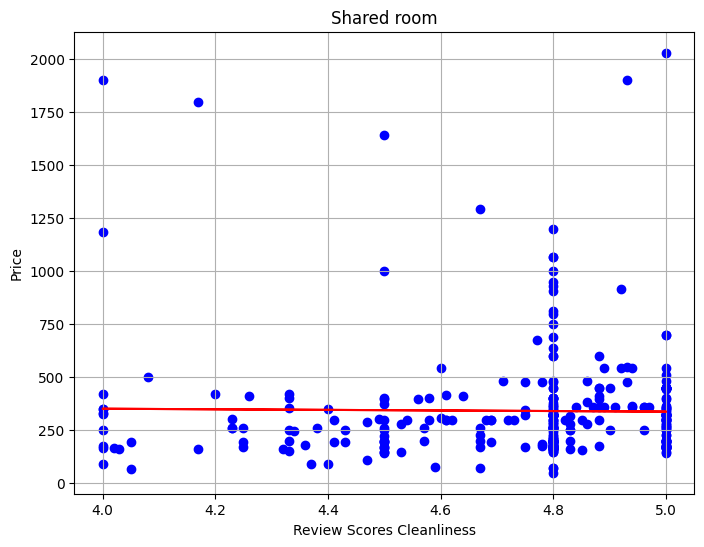

In [316]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['review_scores_cleanliness']],
    model.predict(cd_shared[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [317]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['review_scores_cleanliness'], cd_shared['price'])[0, 1])

Pendiente: [-13.69242022]
y = -13.692420217157569x + 406.35818994965194

Puntaje del modelo: 0.00017609679385077737
Coeficiente de correlación: -0.013270146715494782


#### hotel room

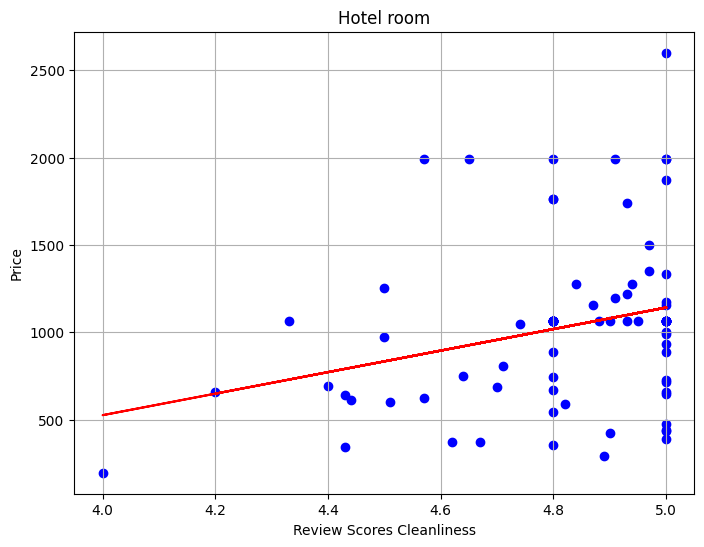

In [318]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['review_scores_cleanliness']],
    model.predict(cd_hotel[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [319]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['review_scores_cleanliness'], cd_hotel['price'])[0, 1])

Pendiente: [615.9010491]
Intercepto: -1937.3883709743466
y = 615.9010491032187x + -1937.3883709743466

Puntaje del modelo: 0.07459692800770701
Coeficiente de correlación: 0.27312438193560673


### x = host_idendity_verified, y = price

#### Entire home/apt

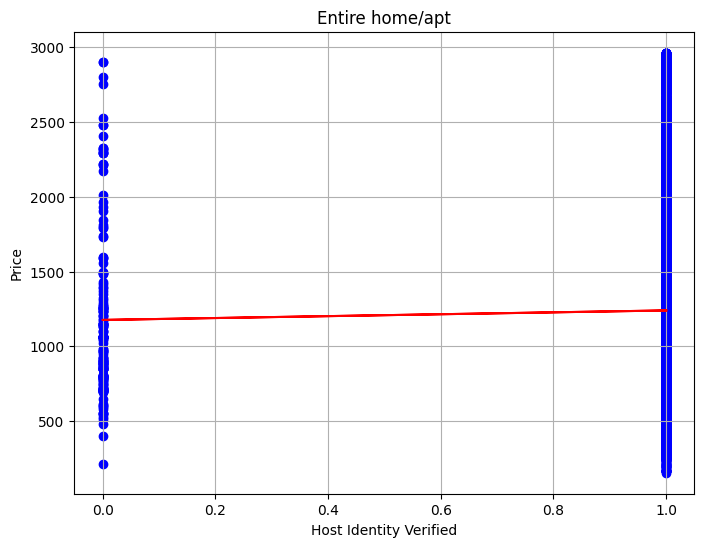

In [320]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_identity_verified']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_identity_verified']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_identity_verified']],
    model.predict(cd_entire[['host_identity_verified']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [321]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_identity_verified']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_identity_verified'], cd_entire['price'])[0, 1])

Pendiente: [63.5640543]
Intercepto: 1176.4954212454213
y = 63.56405430053205x + 1176.4954212454213

Puntaje del modelo: 0.00015083271324467518
Coeficiente de correlación: 0.012281397039629181


#### private room

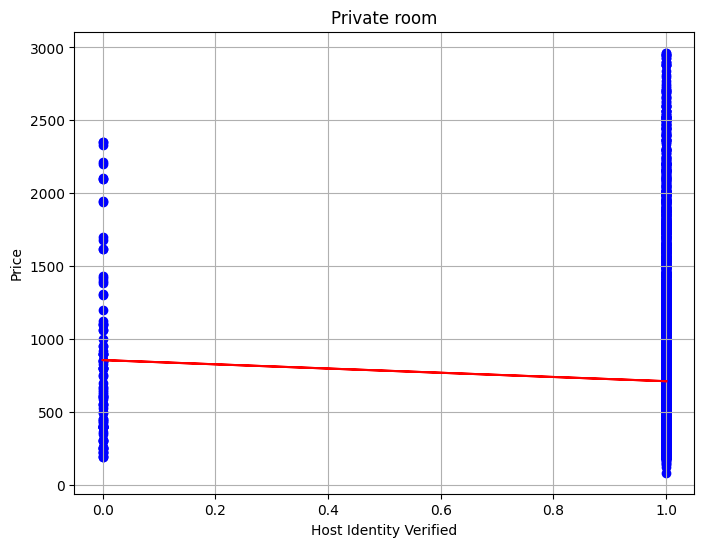

In [322]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_identity_verified']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_identity_verified']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_identity_verified']],
    model.predict(cd_private[['host_identity_verified']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [323]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_identity_verified']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_identity_verified'], cd_private['price'])[0, 1])

Pendiente: [-144.87840341]
Intercepto: 855.6319444444446
y = -144.87840341382181x + 855.6319444444446

Puntaje del modelo: 0.001287586746548941
Coeficiente de correlación: -0.03588295899935359


#### shared room

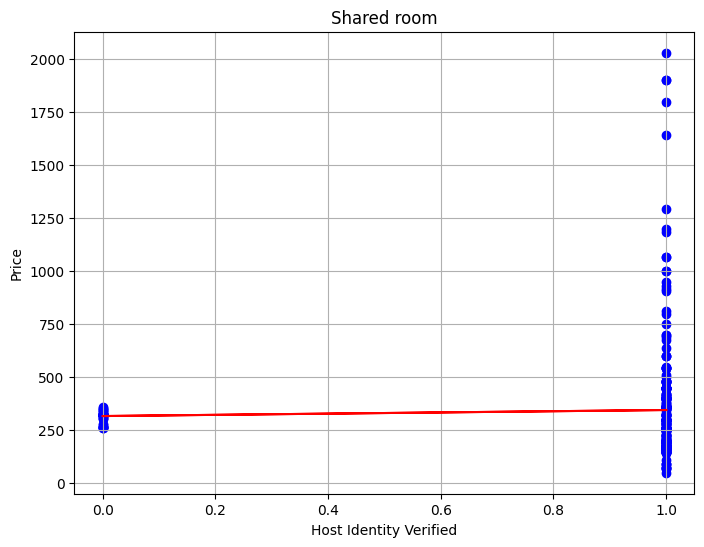

In [324]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_identity_verified']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_identity_verified']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_identity_verified']],
    model.predict(cd_shared[['host_identity_verified']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [325]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_identity_verified']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_identity_verified'], cd_shared['price'])[0, 1])

Pendiente: [28.53071744]
Intercepto: 316.9795918367347
y = 28.530717441615806x + 316.9795918367347

Puntaje del modelo: 0.0014737432731946054
Coeficiente de correlación: 0.03838936406342913


#### hotel room

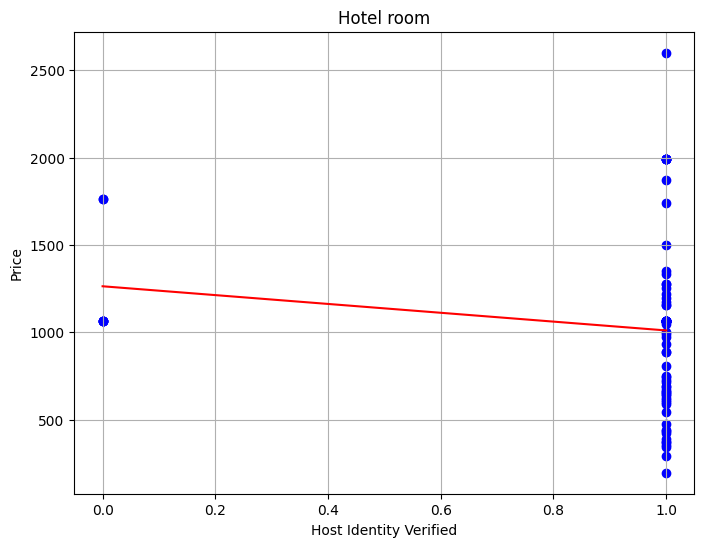

In [326]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_identity_verified']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_identity_verified']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_identity_verified']],
    model.predict(cd_hotel[['host_identity_verified']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [327]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_identity_verified']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_identity_verified'], cd_hotel['price'])[0, 1])

Pendiente: [-252.80050595]
Intercepto: 1263.7857142857142
y = -252.80050595238092x + 1263.7857142857142

Puntaje del modelo: 0.022632516511862488
Coeficiente de correlación: -0.15044107322092204


### x = instant_bookable, y = price

#### Entire home/apt

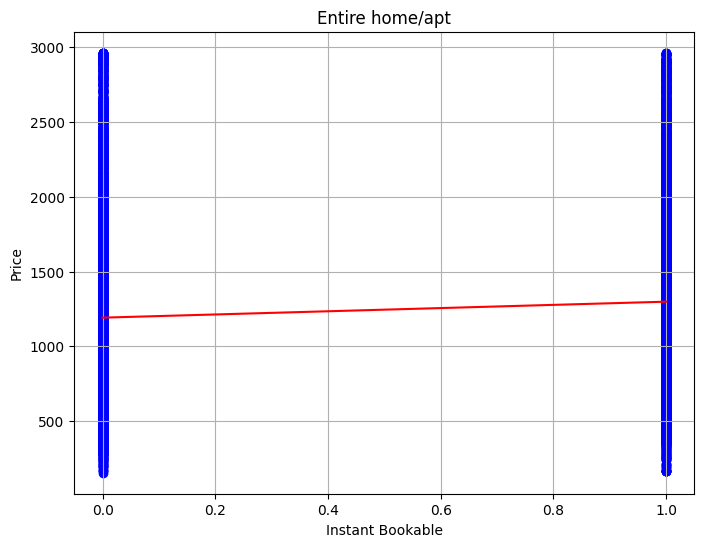

In [328]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['instant_bookable']],
    model.predict(cd_entire[['instant_bookable']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [329]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['instant_bookable'], cd_entire['price'])[0, 1])

Pendiente: [106.94990778]
Intercepto: 1191.766617641513
y = 106.94990778221586x + 1191.766617641513

Puntaje del modelo: 0.009329884149478773
Coeficiente de correlación: 0.09659132543597349


#### private room

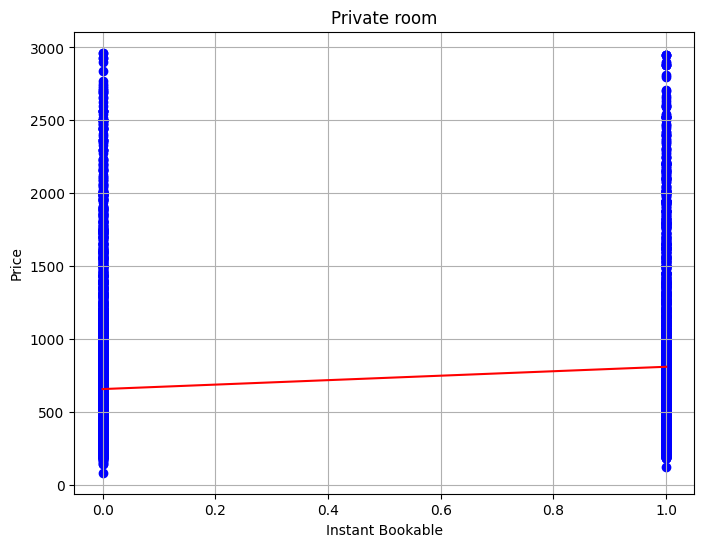

In [330]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['instant_bookable']],
    model.predict(cd_private[['instant_bookable']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [331]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['instant_bookable'], cd_private['price'])[0, 1])

Pendiente: [152.97757145]
Intercepto: 656.8053242737993
y = 152.97757145013165x + 656.8053242737993

Puntaje del modelo: 0.025648548989172903
Coeficiente de correlación: 0.16015164372923468


#### shared room

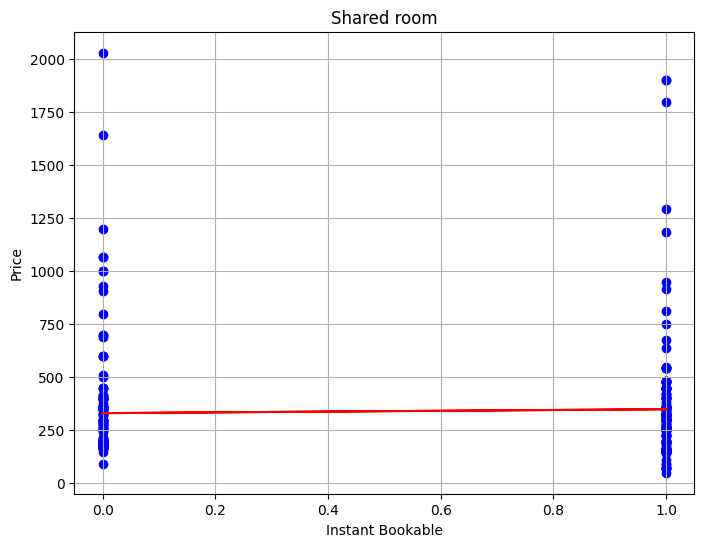

In [332]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['instant_bookable']],
    model.predict(cd_shared[['instant_bookable']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [333]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['instant_bookable'], cd_shared['price'])[0, 1])

Pendiente: [18.56228741]
Intercepto: 330.69791666666663
y = 18.562287414965976x + 330.69791666666663

Puntaje del modelo: 0.0012347781354363763
Coeficiente de correlación: 0.03513941000410092


#### hotel room

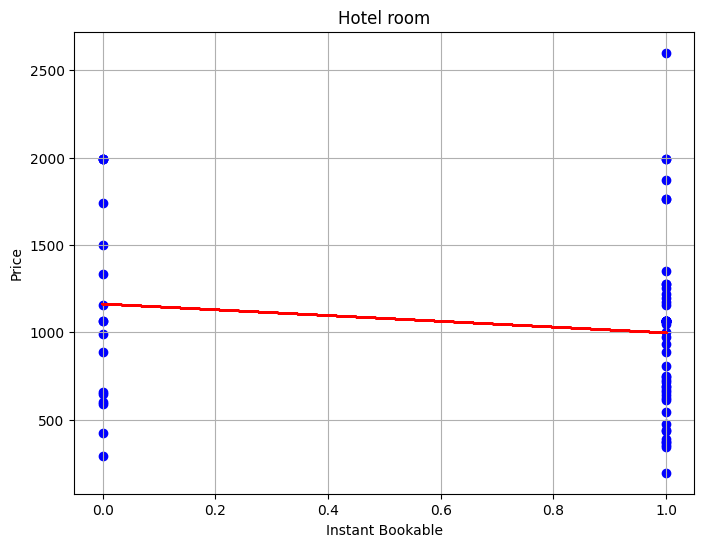

In [334]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['instant_bookable']],
    model.predict(cd_hotel[['instant_bookable']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [335]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['instant_bookable'], cd_hotel['price'])[0, 1])

Pendiente: [-165.04955717]
Intercepto: 1162.2268518518517
y = -165.0495571658616x + 1162.2268518518517

Puntaje del modelo: 0.021396328842533174
Coeficiente de correlación: -0.14627484008719213


### x = property_type, y = price

#### Entire home/apt

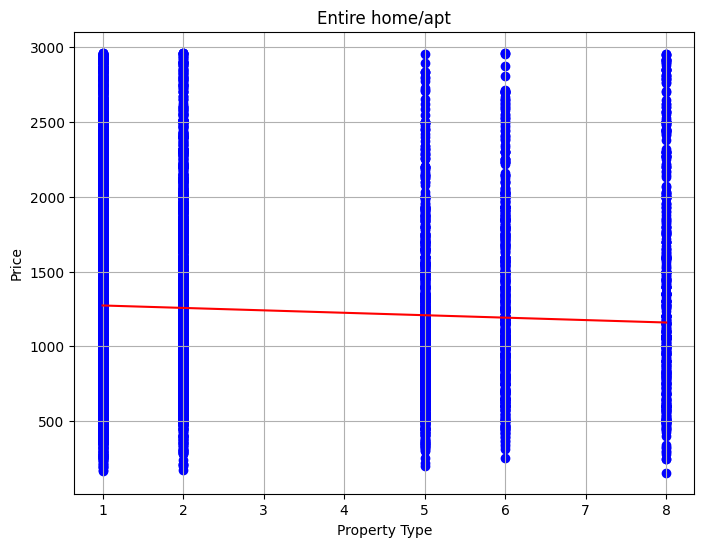

In [336]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_entire
#    - Se utiliza pd.to_numeric(..., errors='coerce') para convertir a numérico
#      y, si no es posible, se asigna NaN (valores no interpretables).
#    - Después, con .notnull() se conservan únicamente los valores válidos.
# ---------------------------------------------------------------------------------
cd_entire_num = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire_num[['property_type']], cd_entire_num['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire_num[['property_type']], cd_entire_num['price'], color='blue')
plt.plot(
    cd_entire_num[['property_type']],
    model.predict(cd_entire_num[['property_type']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [337]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
#print('Puntaje del modelo:', model.score(cd_entire[['property_type']], cd_entire['price']))
#print('Coeficiente de correlación:', -1*np.sqrt(model.score(cd_entire_num[['property_type']], cd_entire_num['price'])))

print('Puntaje del modelo:', model.score(cd_entire_num[['property_type']], cd_entire_num['price']))
print('Coeficiente de correlación:', -1*np.sqrt(model.score(cd_entire_num[['property_type']], cd_entire_num['price'])))

Pendiente: [-16.27961992]
Intercepto: 1289.5273090661908
y = -16.279619917081785x + 1289.5273090661908

Puntaje del modelo: 0.0034958983828141665
Coeficiente de correlación: -0.05912612267698743


#### private room

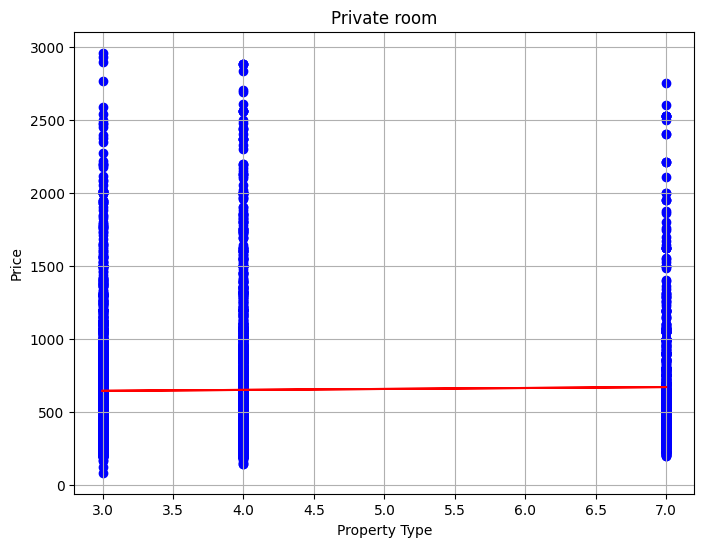

In [338]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_private
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN
#      a valores que no se puedan convertir (errors='coerce').
#    - Mantenemos únicamente los valores no nulos (notnull()).
# ---------------------------------------------------------------------------------
cd_private_num = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]

# 2) Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private_num[['property_type']], cd_private_num['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private_num[['property_type']], cd_private_num['price'], color='blue')
plt.plot(
    cd_private_num[['property_type']],
    model.predict(cd_private_num[['property_type']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [339]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private_num[['property_type']], cd_private_num['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', -1*np.sqrt(model.score(cd_private_num[['property_type']], cd_private_num['price'])))

Pendiente: [6.53068343]
Intercepto: 624.179977527351
y = 6.530683425015893x + 624.179977527351

Puntaje del modelo: 0.00046912332029702686
Coeficiente de correlación: -0.021659254841684347


#### shared room

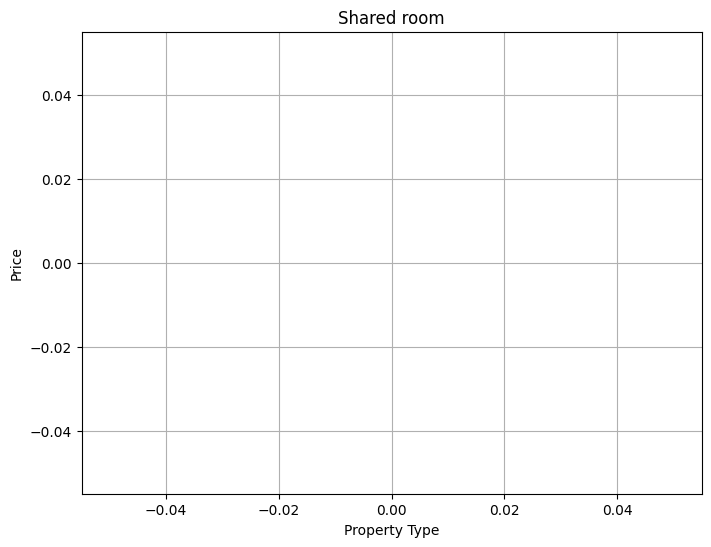

In [340]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_shared
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN a
#      valores no convertibles. Posteriormente, descartamos las filas con NaN.
# ---------------------------------------------------------------------------------
cd_shared_num = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]

# ---------------------------------------------------------------------------------
# 2) Crear instancia del modelo (aunque en este caso no entrenamos el modelo debido
#    a que al parecer no existen registros de los 6 tipos de propiedad deseados).
# ---------------------------------------------------------------------------------
model = LinearRegression()
#plt.plot(ny_shared[['property_type']], model.predict(ny_shared[['property_type']]), color='red')

# ---------------------------------------------------------------------------------
# 3) Visualizar la distribución de 'property_type' contra 'price'
#    - Trazamos únicamente el diagrama de dispersión (scatter), sin la línea de regresión.
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared_num[['property_type']], cd_shared_num['price'])
# plt.plot(...)  # Línea de regresión comentada, ya que no se ha entrenado el modelo

plt.title('Shared room')         # Título de la gráfica
plt.xlabel('Property Type')       # Etiqueta del eje X
plt.ylabel('Price')               # Etiqueta del eje Y
plt.grid(True)                    # Cuadrícula para facilitar la lectura
plt.show()                        # Muestra la gráfica

# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------


#### hotel room

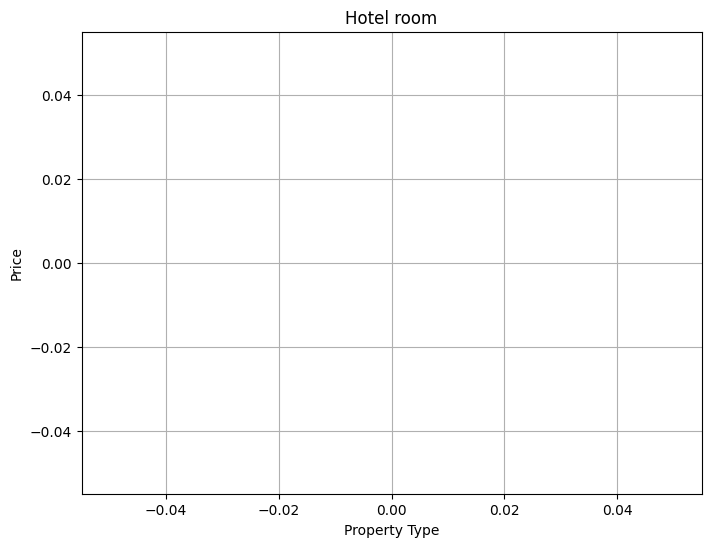

In [341]:
# 1) Filtrar valores no numéricos en la columna "property_type"
cd_hotel_num = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel_num[['property_type']], cd_hotel_num['price'], color='blue')
#plt.plot(cd_hotel_num[['property_type']], model.predict(cd_hotel_num[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------

### Tablas

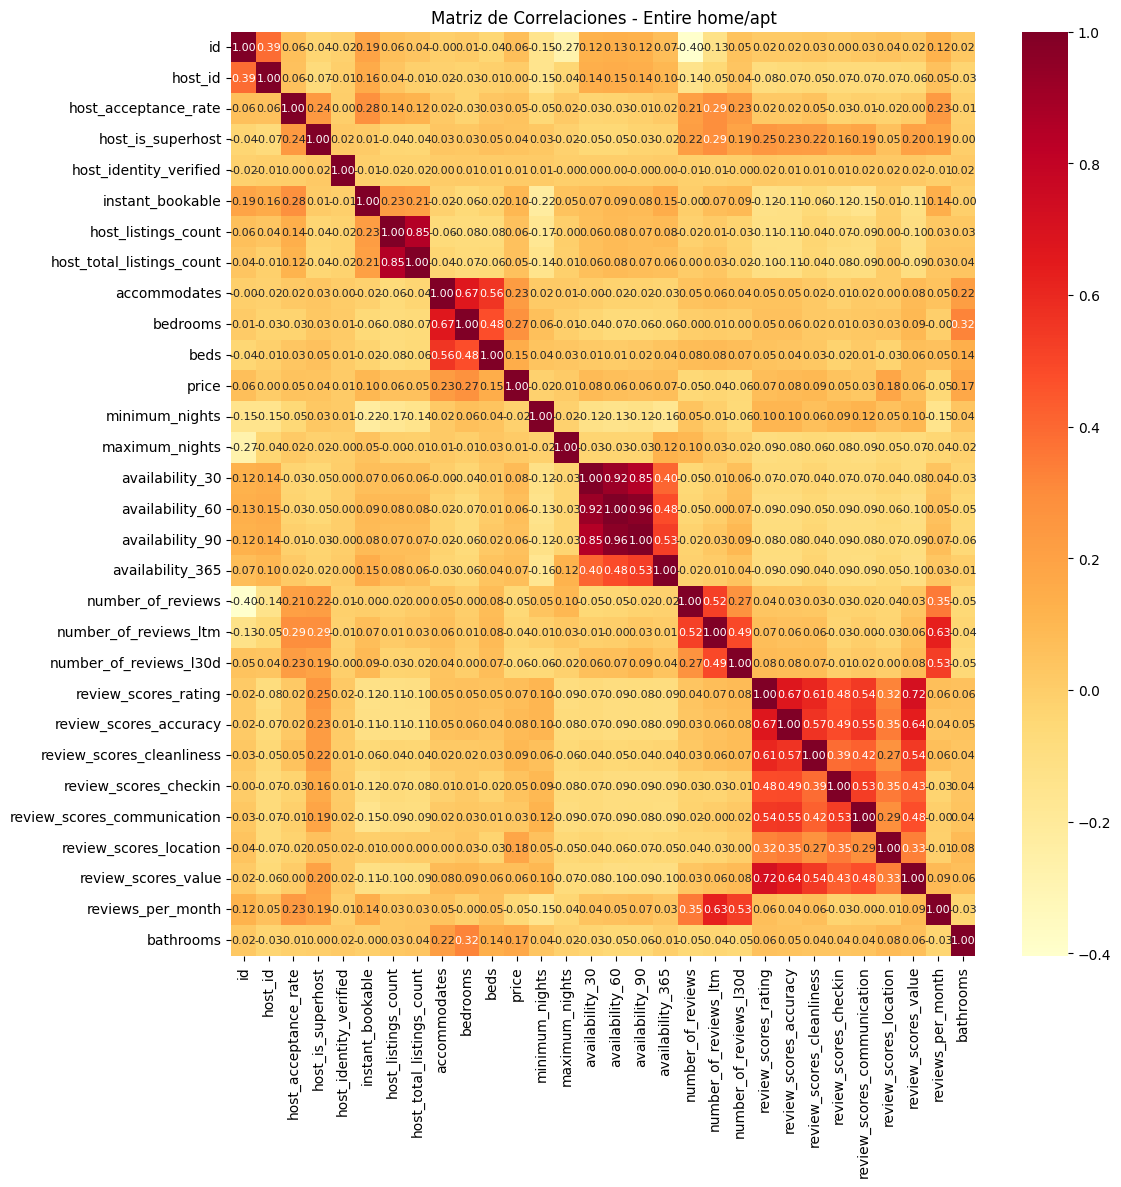

In [342]:
# ---------------------------------------------------------------------------------
# 1) Análisis de correlaciones para tipos específicos de alojamiento
#    - Creamos matrices de correlación separadas por tipo de propiedad
#    - Visualizamos las relaciones entre variables numéricas usando heatmaps
#    - Aplicamos formato especial para mejor legibilidad de los resultados
# ---------------------------------------------------------------------------------

# Para propiedades completas (Entire home/apt)
matriz = cd_entire.select_dtypes(include=[np.number])  # Seleccionamos solo columnas numéricas
correlaciones = matriz.corr()                          # Calculamos la matriz de correlación

plt.figure(figsize=(12, 12))                           # Configuramos tamaño de figura
sns.heatmap(correlaciones,                            # Creamos heatmap con valores anotados
            annot=True,                                # Muestra valores numéricos
            cmap='YlOrRd',                             # Usa escala de colores amarillo-rojo oscuro
            annot_kws={"size": 8},                     # Define tamaño de fuente para anotaciones
            fmt='.2f')                                 # Formatea números a 2 decimales

plt.title('Matriz de Correlaciones - Entire home/apt')  # Agregamos título descriptivo
plt.show()

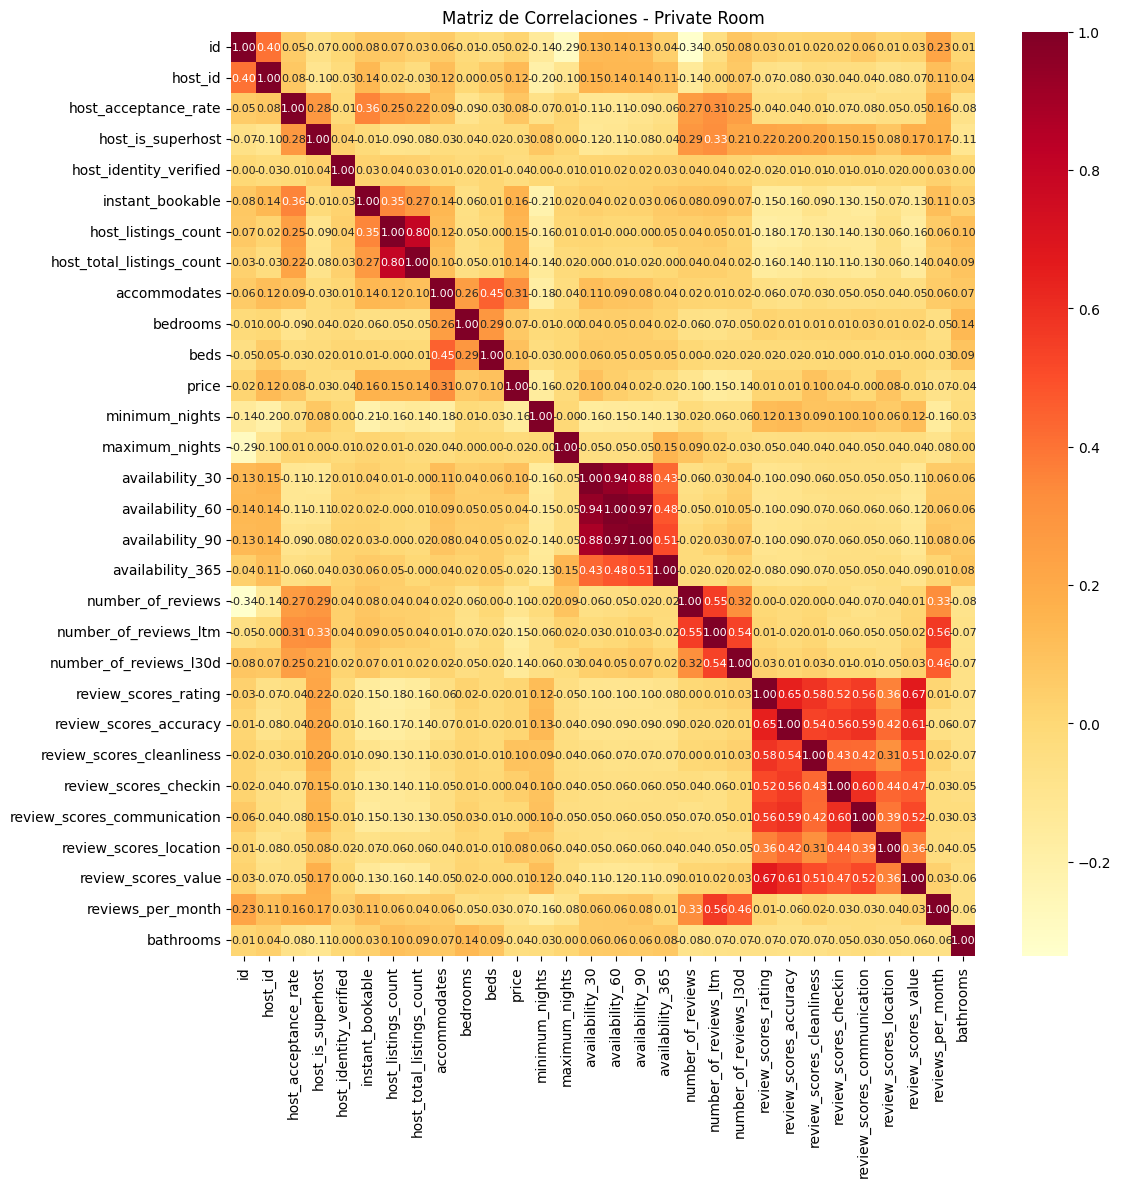

In [ ]:
# Para habitaciones privadas (Private room)
matriz = cd_private.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones,
            annot=True,
            cmap='YlOrRd',
            annot_kws={"size": 8},
            fmt='.2f')

plt.title('Matriz de Correlaciones - Private Room')
plt.show()

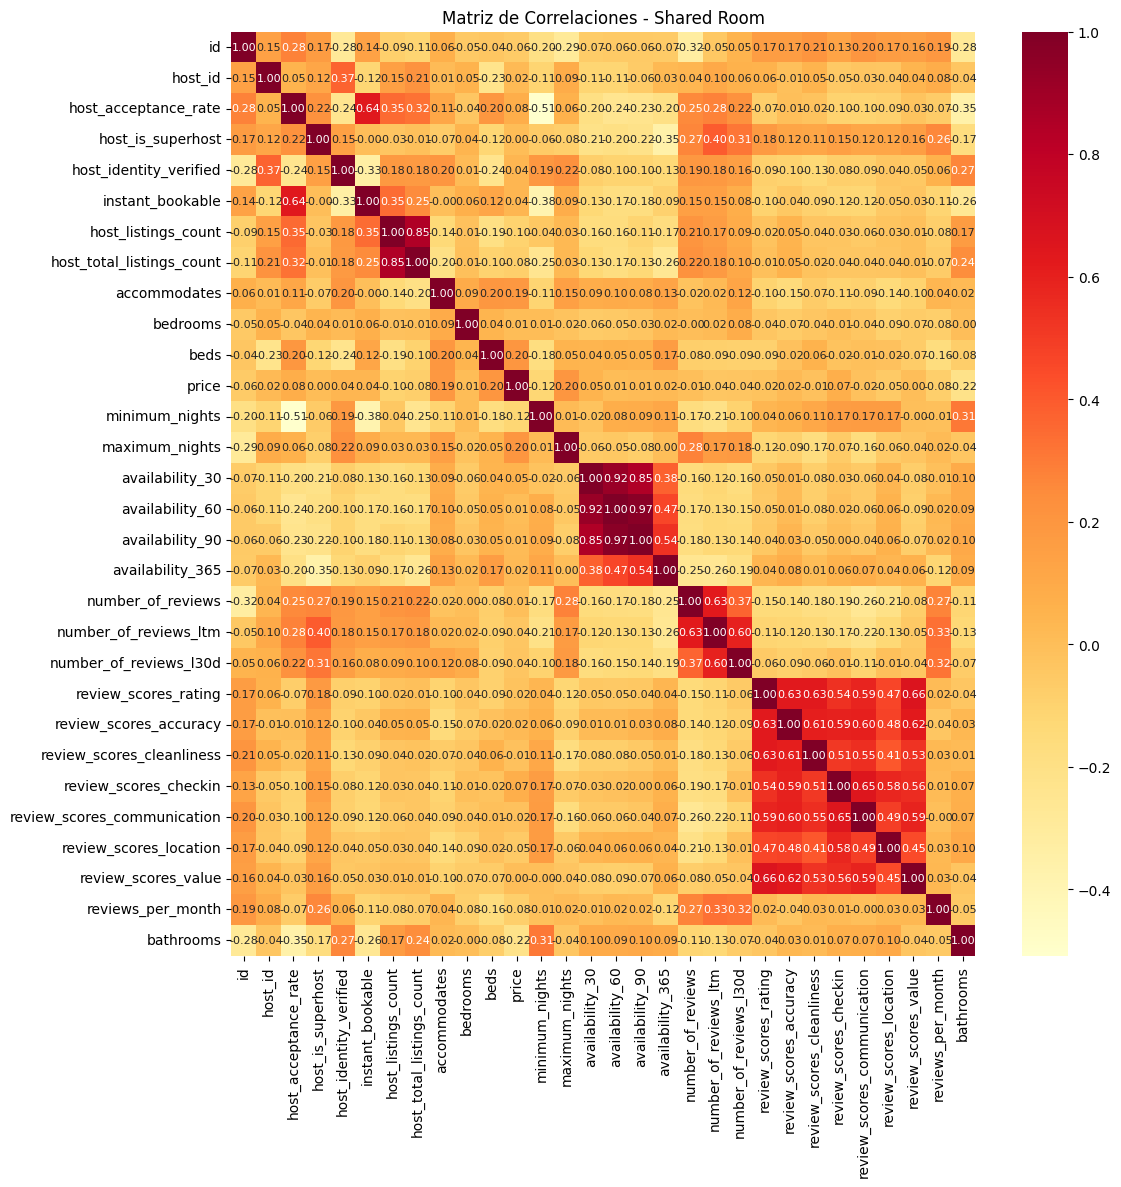

In [ ]:
# Para habitaciones compartidas (Shared room)
matriz = cd_shared.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones,
            annot=True,
            cmap='YlOrRd',
            annot_kws={"size": 8},
            fmt='.2f')

plt.title('Matriz de Correlaciones - Shared Room') 
plt.show()

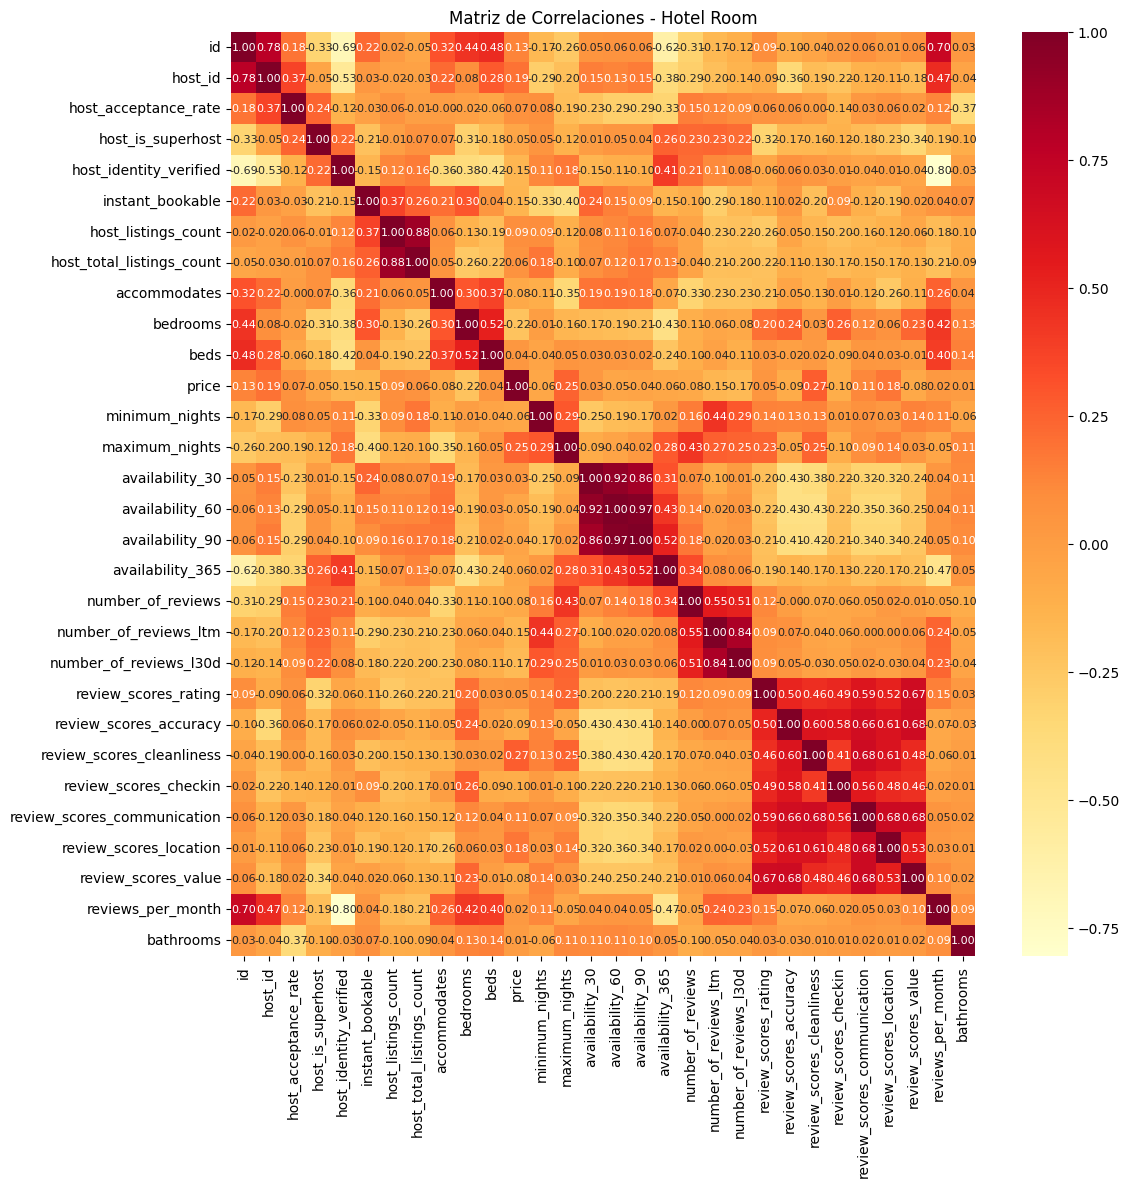

In [345]:


# Para cuartos de hotel (Hotel room)
matriz = cd_hotel.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones,
            annot=True,
            cmap='YlOrRd',
            annot_kws={"size": 8},
            fmt='.2f')

plt.title('Matriz de Correlaciones - Hotel Room')
plt.show()